# Import basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Projects/Churn_Modelling(1).csv')

# Preprocessing

In [ ]:
# To get first five records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# To get number of Rows & Columns
df.shape

(10000, 14)

In [ ]:
# To get properties of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


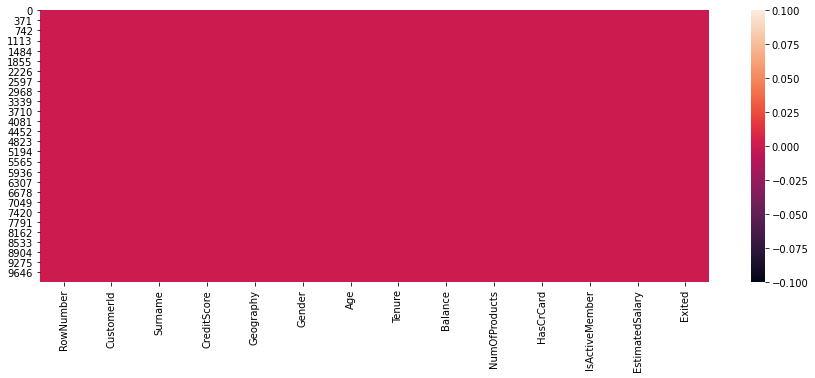

In [ ]:
# Visulization of null values by using Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# Null values in %
df.isnull().sum()/df.shape[0]*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [ ]:
# Machine only knows numerical figures.
# In this dataset we have categorical("strings") values also.
# so we need to convert them into numerical values.
# For convertion form categorical values to Numerical values we need to have segrigate such values and put into 
# diffrent diffrent data frames.
df_cat=df.select_dtypes('object') 
df_num=df.select_dtypes(['int64','float64']) 

In [ ]:
# Convertion of categorical values to Numerical values.
# we have two methods for such process:
# 1] LabelEncoder
# 2] One Hot Encoder
# Here we will used LabelEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le=LabelEncoder()
for col in df_cat:
  df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
# check LabelEncoder method applicable or not
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Surname    10000 non-null  int64
 1   Geography  10000 non-null  int64
 2   Gender     10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
# Crete new data frame by concating categorical & numerical dataframe
new_df=pd.concat([df_num,df_cat],axis=1)

In [ ]:
# Check new data frame
new_df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1115,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1177,2,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,2040,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,289,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1822,2,0


In [ ]:
# Drop unwanted Column
new_df.drop(['RowNumber','CustomerId'],axis=1,inplace=True) 

 

In [ ]:
# check Unwanted column drop or not
new_df.head()

In [ ]:
new_df.shape

(10000, 14)

# Checking correlationship between input & Output data

# By Using Barplot

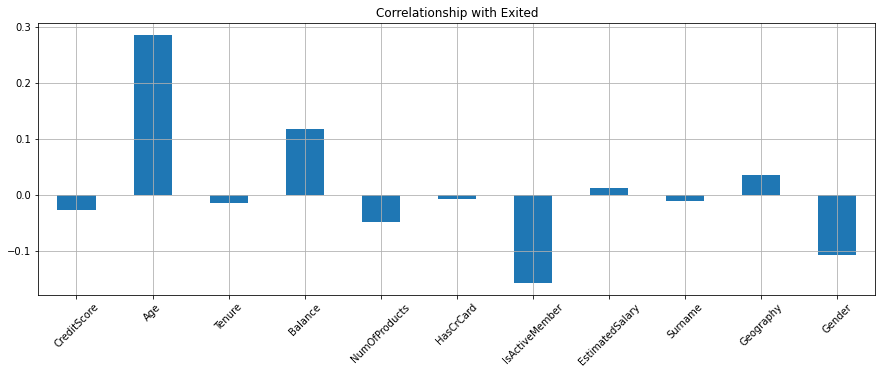

In [ ]:
# By using Barplot
new_df2=new_df.drop('Exited',axis=1)
new_df2.corrwith(new_df["Exited"]).plot.bar(figsize=(15,5),title="Correlationship with Exited",grid=True,rot=45)

# By Using Heatmap

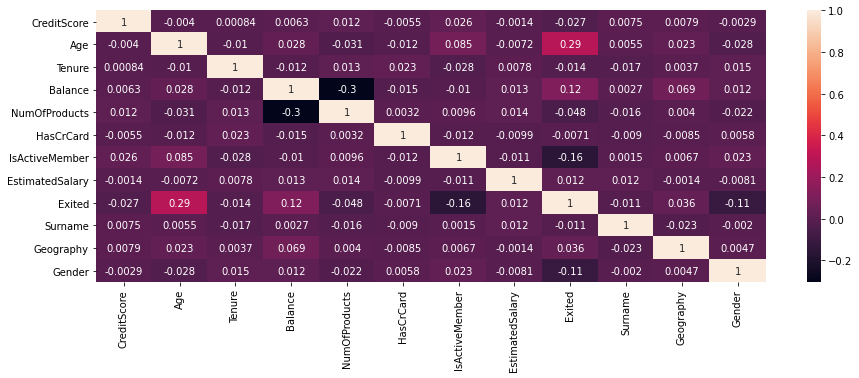

In [ ]:
# BY using heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data=new_df.corr(),annot=True)
plt.show()

# Spliting of data into X & Y

In [ ]:
x=new_df.drop('Exited',axis=1)
y=new_df['Exited']

# Divide data for train(80%) & Test(20%)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

#  Scalling input data

In [ ]:
# There are two types of Scalling of data:
# 1] MinMax Scaller
# 2] Standard Scaller
# We will apply Standard Scaler to Scale our data set
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.36808204,
         1.51919821, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -1.28969918,
         0.3131264 ,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.39287791,
        -0.89294542, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.35926357,
        -0.89294542,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.72703182,
         1.51919821, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.38353208,
         0.3131264 , -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.3988819 ,
         0.3131264 , -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.77961265,
        -0.89294542, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.41413152,
         1.51919821, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -1.19760022,
         1.51919821,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -1.34047168,
         0.3131264 ,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.51331501,
         0.3131264 ,  0.91601335]])

# Balancing of Output data

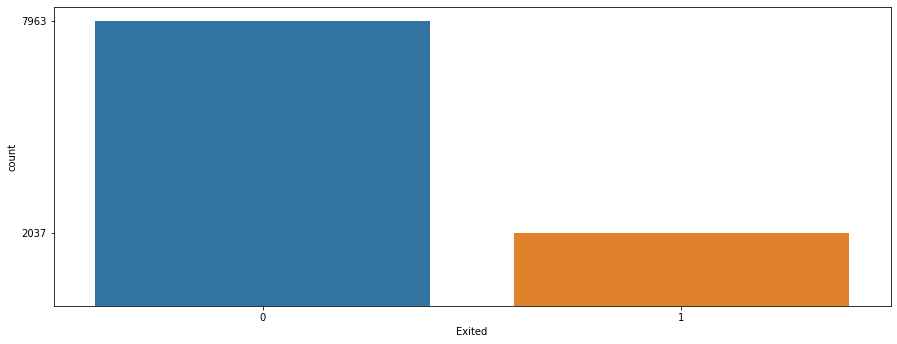

In [ ]:
#  Visualiztion of Output by using countplot
plt.figure(figsize=(15,5.5))
sns.countplot(data=new_df,x='Exited') 
plt.yticks(new_df['Exited'].value_counts())
plt.show()

In [ ]:
# Checking of output data in figures
pd.Series(y_train).value_counts()


0    6368
1    1632
Name: Exited, dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

0    1595
1     405
Name: Exited, dtype: int64

In [ ]:
# by looking above two table its clearly indicating that output data is imbalance.
# here we need to balance output data,for this we have two methods:
# 1] Randomoversampling
# 2] Randomundersampling
# Here we will apply RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_train_sample,y_train_sample=ros.fit_resample(x_train,y_train)
x_test_sample,y_test_sample=ros.fit_resample(x_test,y_test)

In [ ]:
# Verifying sampling metod apply or not
pd.Series(y_train_sample).value_counts()

1    6368
0    6368
dtype: int64

In [ ]:
pd.Series(y_test_sample).value_counts()

1    1595
0    1595
dtype: int64

#Training a Model

In [ ]:
# Create user define function
def create_model(model):
  model.fit(x_train_sample,y_train_sample)
  y_pred=model.predict(x_test_sample)
  print(classification_report(y_test_sample,y_pred))
  print(confusion_matrix(y_test_sample,y_pred))
  return model

# 1] Logistic Regression (Base model)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1595
           1       0.70      0.72      0.71      1595

    accuracy                           0.71      3190
   macro avg       0.71      0.71      0.71      3190
weighted avg       0.71      0.71      0.71      3190

[[1107  488]
 [ 447 1148]]


In [ ]:
# Cross Validation 
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=lr,X=x_train_sample,y=y_train_sample,cv=3)
print("Accuracy is :",accuracy.mean()*100)

Accuracy is : 69.08762463056757


# 2]RandomForestClassifier(Ensemble Technique)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_features=10,random_state=0)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.67      0.91      0.78      1595
           1       0.87      0.56      0.68      1595

    accuracy                           0.74      3190
   macro avg       0.77      0.74      0.73      3190
weighted avg       0.77      0.74      0.73      3190

[[1458  137]
 [ 708  887]]


In [ ]:
# Cross Validation 
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=rfc,X=x_train_sample,y=y_train_sample,cv=3)
print("Accuracy is :",accuracy.mean()*100)

Accuracy is : 94.33106583512121


# 3]XGBClassifier (Ensemble technique)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimtor=100,reg_alpha=1)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1595
           1       0.78      0.77      0.78      1595

    accuracy                           0.78      3190
   macro avg       0.78      0.78      0.78      3190
weighted avg       0.78      0.78      0.78      3190

[[1254  341]
 [ 370 1225]]


In [ ]:
# Cross Validation 
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=xgb,X=x_train_sample,y=y_train_sample,cv=3)
print("Accuracy is :",accuracy.mean()*100)

Accuracy is : 78.90234112116606


# HyperParameter Tuning
#  A hyperparameter is a parameter whose value is used to control the learning process. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param={
    'lerning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree=1':[0.3,0.4,0.5,0.6]
}

In [ ]:
rsc=RandomizedSearchCV(estimator=xgb,param_distributions=param,n_iter=5,scoring='roc_auc',verbose=3,n_jobs=-1,cv=5)

In [ ]:
rsc.fit(x_train_sample,y_train_sample)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_estimtor=100, n_jobs=1,
                                           nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=1,...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree=1': [

In [ ]:
rsc.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsample_bytree=1=0.4,
              gamma=0.3, learning_rate=0.1, lerning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
              n_estimtor=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
rsc.best_params_

{'colsample_bytree=1': 0.4,
 'gamma': 0.3,
 'lerning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 1}

# Final Model

In [ ]:
xgb2=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsample_bytree1=0.4,
              gamma=0.3, learning_rate=0.1, lerning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
              n_estimtor=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
xgb2=create_model(xgb2)

              precision    recall  f1-score   support

           0       0.69      0.91      0.78      1595
           1       0.86      0.59      0.70      1595

    accuracy                           0.75      3190
   macro avg       0.78      0.75      0.74      3190
weighted avg       0.78      0.75      0.74      3190

[[1447  148]
 [ 653  942]]


In [ ]:
# Cross Validation 
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=xgb2,X=x_train_sample,y=y_train_sample,cv=3)
print("Accuracy is :",accuracy.mean()*100)

Accuracy is : 93.4359912125891
